In [1]:
import pandas as pd
import numpy as np
import os

from tqdm.notebook import tqdm

In [2]:
root = "/Users/maximebonnin/Documents/Projects/SCOR/Datathon/"
os.chdir(root)

In [3]:
pathPreds = "/Users/maximebonnin/Documents/Projects/SCOR/Datathon/Outputs/Predictions/kmeans_labels_Kharif"

df_preds = pd.read_csv(pathPreds)
df_preds["State"] = df_preds["key"].apply(lambda x: x.split("_")[0])
df_preds["District"] = df_preds["key"].apply(lambda x: x.split("_")[1])
df_preds["SubDistrict"] = df_preds["key"].apply(lambda x: x.split("_")[2])
df_preds["Block"] = df_preds["key"].apply(lambda x: x.split("_")[3])
df_preds["GP"] = df_preds["key"].apply(lambda x: x.split("_")[4])
df_preds["Cluster"] = df_preds["0"]

In [4]:
df_preds

,key,0,State,District,SubDistrict,Block,GP,Cluster
0,andhra pradesh_anantapur_agali__agali,0,andhra pradesh,anantapur,agali,,agali,0
1,andhra pradesh_anantapur_agali__akkagaladevara...,0,andhra pradesh,anantapur,agali,,akkagaladevarahalli,0
2,andhra pradesh_anantapur_agali__hulikeradevara...,0,andhra pradesh,anantapur,agali,,hulikeradevarahalli,0
3,andhra pradesh_anantapur_agali__inagalore,0,andhra pradesh,anantapur,agali,,inagalore,0
4,andhra pradesh_anantapur_agali__kodihalli,0,andhra pradesh,anantapur,agali,,kodihalli,0
...,...,...,...,...,...,...,...,...
372904,west bengal_uttar dinajpur__hemtabad__,1,west bengal,uttar dinajpur,,hemtabad,,1
372905,west bengal_uttar dinajpur__itahar__,1,west bengal,uttar dinajpur,,itahar,,1
372906,west bengal_uttar dinajpur__kaliaganj__,1,west bengal,uttar dinajpur,,kaliaganj,,1
372907,west bengal_uttar dinajpur__karandighi__,1,west bengal,uttar dinajpur,,karandighi,,1


In [5]:
pathSubmission = "/Users/maximebonnin/Documents/Projects/SCOR/Datathon/Data/03_Prediction/GP_Pred_Kharif.csv"

df_submission = pd.read_csv(pathSubmission)
df_submission

,key,State,District,Sub-District,Block,GP,Cluster
0,andhra pradesh_anantapur_agali__agali,andhra pradesh,anantapur,agali,NaN,agali,NaN
1,andhra pradesh_anantapur_agali__akkagaladevara...,andhra pradesh,anantapur,agali,NaN,akkagaladevarahalli,NaN
2,andhra pradesh_anantapur_agali__hulikeradevara...,andhra pradesh,anantapur,agali,NaN,hulikeradevarahalli,NaN
3,andhra pradesh_anantapur_agali__inagalore,andhra pradesh,anantapur,agali,NaN,inagalore,NaN
4,andhra pradesh_anantapur_agali__kodihalli,andhra pradesh,anantapur,agali,NaN,kodihalli,NaN
...,...,...,...,...,...,...,...
285036,uttar pradesh_sitapur_behta_rohiya shivpur_ram...,uttar pradesh,sitapur,behta,rohiya shivpur,ramuwapur,NaN
285037,uttar pradesh_hamirpur_sarila_jalalpur_kupara,uttar pradesh,hamirpur,sarila,jalalpur,kupara,NaN
285038,uttar pradesh_hamirpur_maudaha_bhulsi_bhulsi,uttar pradesh,hamirpur,maudaha,bhulsi,bhulsi,NaN
285039,uttar pradesh_hamirpur_sarila_jalalpur_bhendid...,uttar pradesh,hamirpur,sarila,jalalpur,bhendidanda,NaN


In [6]:
from Environnement.extractClusters import get_closest_keys_scoring, score_fn, get_cluster

In [7]:
from tqdm.notebook import tqdm, trange
STATES_NOT_INCLUDED = {"Rabi": ['Assam', 'Uttarakhand', 'Jharkhand'], "Kharif":['Assam', 'Tamil nadu']}

season = "Rabi"
STATES_NOT_INCLUDED = STATES_NOT_INCLUDED[season]


def fill_submission(df_submission, df_preds, rule="max"):
    """
    Fill the submission with the predictions of the model
    """
    Clusters = [-1]*len(df_submission)
    print(len(Clusters), len(df_submission))
    for i in trange(len(df_submission)):
        key = df_submission.iloc[i]["key"]
        state = key.split("_")[0]
        if not state in STATES_NOT_INCLUDED:
            Clusters[i] = get_cluster(get_closest_keys_scoring(key, df_preds, score_fn=score_fn), rule=rule)[0]
        
        # if i==3:
        #     break

    df_submission["Cluster"] = Clusters

    return df_submission

In [8]:
df_submission.sort_values(by=["State"], inplace=True)
states = {}
indices = []
counts = []
count = 0
for i in trange(len(df_submission)):
    state = df_submission.iloc[i]["State"]
    if not state in states:
        states[state] = i
        counts.append(count)
        count = 0


    else:
        count += 1




print(states)

  0%|          | 0/285041 [00:00<?, ?it/s]

{'andhra pradesh': 0, 'assam': 20794, 'chhattisgarh': 20968, 'gujarat': 54725, 'haryana': 63623, 'jharkhand': 63790, 'karnataka': 64080, 'madhya pradesh': 81407, 'maharashtra': 126775, 'odisha': 129751, 'rajasthan': 137046, 'tamil nadu': 149125, 'telangana': 151680, 'uttar pradesh': 172960, 'uttarakhand': 280895, 'west bengal': 281069}


In [9]:
print(counts)

[0, 20793, 173, 33756, 8897, 166, 289, 17326, 45367, 2975, 7294, 12078, 2554, 21279, 107934, 173]


In [10]:
df_preds.sort_values(by=["State"], inplace=True)
print(df_preds["State"].value_counts())
len(df_preds["State"].value_counts())

uttar pradesh     204087
rajasthan          31029
madhya pradesh     28938
chhattisgarh       22776
andhra pradesh     19619
telangana          17928
karnataka          15067
maharashtra        11006
gujarat            10344
odisha              7406
west bengal         3746
haryana              451
jharkhand            282
uttarakhand          230
Name: State, dtype: int64


14

In [11]:
print(df_submission["State"].value_counts())
len(df_submission["State"].value_counts())

uttar pradesh     107935
madhya pradesh     45368
chhattisgarh       33757
telangana          21280
andhra pradesh     20794
karnataka          17327
rajasthan          12079
gujarat             8898
odisha              7295
west bengal         3972
maharashtra         2976
tamil nadu          2555
jharkhand            290
assam                174
uttarakhand          174
haryana              167
Name: State, dtype: int64


16

In [12]:
import time 

# fill submission by states
for state in tqdm(["andhra pradesh"]):
    print("Ongoing state to be filled: ", state)
    start = time.time()
    df_sub_sub = df_submission.loc[df_submission["State"] == state]
    df_preds_sub = df_preds.loc[df_preds["State"] == state]
    df_sub_res = fill_submission(df_sub_sub, df_preds_sub, rule="draw")
    print("Time to fill submission by state: ", time.time() - start)
    # Save submission
    df_sub_res.to_csv(f"Outputs/Predictions/Kharif/{state}_GP_Pred_{season}.csv", index=False)

  0%|          | 0/1 [00:00<?, ?it/s]

Ongoing state to be filled:  andhra pradesh
20794 20794


  0%|          | 0/20794 [00:00<?, ?it/s]

Time to precompute the dataframes:  0.0061511993408203125
Time to answer the query with GP:  8.106231689453125e-06
Time to precompute the dataframes:  0.006218910217285156
Time to answer the query with GP:  1.9073486328125e-06
Time to precompute the dataframes:  0.005778789520263672
Time to answer the query with GP:  2.1457672119140625e-06
Time to precompute the dataframes:  0.00516200065612793
Time to answer the query with GP:  9.5367431640625e-07
Time to precompute the dataframes:  0.004293203353881836
Time to answer the query with GP:  9.5367431640625e-07
Time to precompute the dataframes:  0.005074024200439453
Time to answer the query with GP:  2.1457672119140625e-06
Time to precompute the dataframes:  0.0043408870697021484
Time to answer the query with GP:  2.1457672119140625e-06
Time to precompute the dataframes:  0.0043599605560302734
Time to answer the query with GP:  1.1920928955078125e-06
Time to precompute the dataframes:  0.005369663238525391
Time to answer the query with G

KeyboardInterrupt: 

In [19]:
def get_index_case(key, df_State):

    """
    Return the closest keys to the given key using a scoring function.
    """

    # We use these dataframes because they reduce the computation time
    # by reducing the number of comparisons
    start = time.time()
    cols = ["State", "District", "SubDistrict", "Block", "GP"]
    state, district, subDistrict, block, GP = key.split("_")[:5]
    df_District = df_State[df_State["District"] == district].copy()
    df_SubDistrict = df_District[df_District["SubDistrict"] == subDistrict].copy()
    df_Block = df_SubDistrict[df_SubDistrict["Block"] == block].copy()
    df_GP = df_Block[df_Block["GP"] == GP].copy()
    # print("Time to precompute the dataframes: ", time.time()-start)

    start = time.time()
    if len(df_GP)>0:
        # In this case, we have exact matches
        # No need to use the scoring function
        return np.array([1,0,0,0,0,0])

    elif len(df_Block)>0:
        return np.array([0,1,0,0,0,0])

    elif len(df_SubDistrict)>0:
        return np.array([0,0,1,0,0,0])

    elif len(df_District)>0:
        return np.array([0,0,0,1,0,0])

    elif len(df_State)>0:
        return np.array([0,0,0,0,1,0])

    else:
        return np.array([0,0,0,0,0,1])

In [20]:
dfs = {}
for state in states:
    dfs[state] = df_preds.loc[df_preds["State"] == state].copy()

stats = np.array([0,0,0,0,0,0])
for i in trange(len(df_submission)):
    key = df_submission.iloc[i]["key"]
    state = key.split("_")[0]

    df_State = dfs[state]

    stats += get_index_case(key, df_State)
    
    # if i==3:
    #     break

  0%|          | 0/285041 [00:00<?, ?it/s]

ValueError: Shape of passed values is (6, 1), indices imply (6, 6)

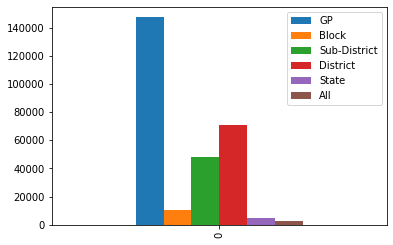

,GP,Block,Sub-District,District,State,All
0,147672,10674,48361,70797,4808,2729


In [27]:
# ploting the stats as a bar plot
import matplotlib.pyplot as plt

df_stats = pd.DataFrame([stats], columns=["GP", "Block", "Sub-District", "District", "State", "All"])
df_stats.plot.bar()
plt.show()
df_stats